<h2> Author- Kumar Selvakumaran</h2>
<h2><b><u> The sparks foundation</u>&nbsp; <u>IOT and Computer vision</u>&nbsp;	
    &#128187;&#128065;</b></h2>

<h2><b><i><u>Task2</u> : Detection of Face mask</i></b></h2>
<hr>


<h3><b>We start by importing the libraries we will be using for this project</b></h3>

In [29]:
import cv2,os
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np


<h2><u>Phase - 1 : Data Preprocessing</u></h2>
<h3><b>The categories that will be required for this task are established here.<br><br>(Intitializing the labels)</b></h3>

In [30]:
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

print(f'Categories : {categories}')
print(f'Labels     : {labels}')
print(f'label_dict : {label_dict}')

Categories : ['with mask', 'without mask']
Labels     : [0, 1]
label_dict : {'with mask': 0, 'without mask': 1}


<h3>Transforming the data so that it is relavent for training</h3>
<h3>
    Dependent variable (data): It is of type 'numpy.ndarray' and of shape [n, w, h, ch]<br>
    <ul>
        <li> n : Number of training samples</li>
        <li> w : Width of the image</li>
        <li> h : Height of the image</li>
        <li> ch : Channels ( 1 since it is converted to grayscale )</li>
    </ul>
        <br>Independent variable (target): It is of type 'numpy.ndarray' of shape [n, nc]<br>
    <ul>
        <li> n : Number of training samples</li>
        <li> nc : Number of classes/categories </li>
    </ul>
</h3>

In [31]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
target=np_utils.to_categorical(target)      

print(f'target shape : {target.shape}')
print(f'data shape   : {data.shape}')

target shape : (1376, 2)
data shape   : (1376, 100, 100, 1)


<h2><u>Phase - 2 : Building and Training the model</u></h2>
<br><br>
<h3><ul>
    <li>In the below code cell we will build a simple sequential neural network. this neural network, when it completes training, will act as our classifier at the time of inference.</li><br>
    <li>The architecture of the neural network can be seen below</li><br>
<img src="conv visualization.bmp" width="1200" height="1000"><br>
    <li>tool used for making this visualization : <a href="https://alexlenail.me/NN-SVG/AlexNet.html">link</a>
    </li><br><br>
     <li>Detailed summary of the architecture can be found in the ouput of the cell below</li><br>
    </ul>
    

In [35]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 100)       1000      
_________________________________________________________________
activation_8 (Activation)    (None, 98, 98, 100)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 100)       90100     
_________________________________________________________________
activation_9 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 52900)            

<br><h3>We split the data in Training and test sets below</h3><br>

In [36]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

<br><h3>The training process begins here &nbsp;&#127947;. We also save the best model <br><br>(The model is saved whenever validation loss is at it's momentary lowest)</h3><br>

In [37]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=1,save_best_only=True,mode='min')
history=model.fit(train_data,train_target,epochs=20,validation_split=0.2,callbacks = checkpoint,verbose=1)

Epoch 1/20
31/31 [==============================] - 21s 664ms/step - loss: 0.7736 - accuracy: 0.5139 - val_loss: 0.6593 - val_accuracy: 0.7177

Epoch 00001: val_loss improved from inf to 0.65925, saving model to model-001.model
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 28s 897ms/step - loss: 0.6411 - accuracy: 0.6260 - val_loss: 0.4926 - val_accuracy: 0.8024

Epoch 00002: val_loss improved from 0.65925 to 0.49258, saving model to model-002.model
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 30s 979ms/step - loss: 0.4673 - accuracy: 0.7914 - val_loss: 0.3723 - val_accuracy: 0.8669

Epoch 00003: val_loss improved from 0.49258 to 0.37231, saving model to model-003.model
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 24s 772ms/step - loss: 0.3017 - accuracy: 0.8905 - val_loss: 0.2961 - val_accuracy

<br><h3> Upon analysis of the training process we know that the results did not improve beyond that of epoch 14. 
<hr>

<h3> The training process is visualized below. Insights from these graphs will tell us if training was done properly or not</h3><br>

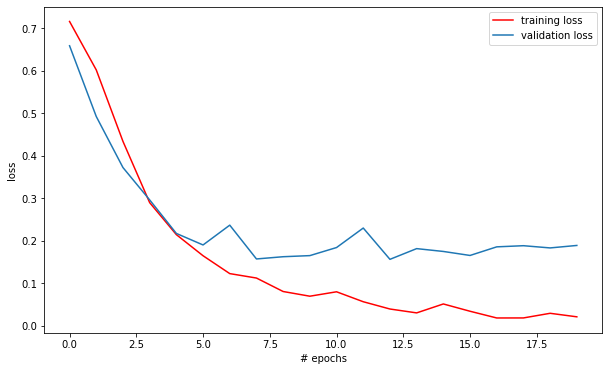

In [38]:
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

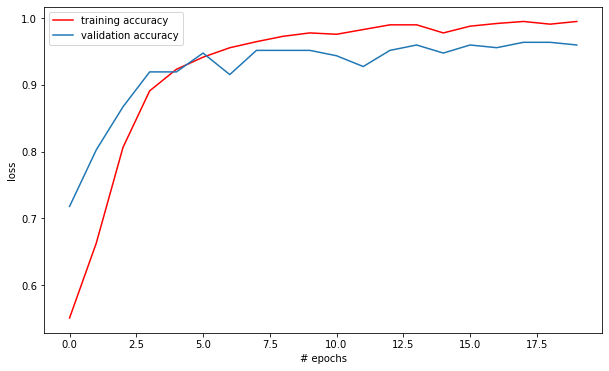

In [39]:
plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<br><h3>With this the training proces is comlete. &nbsp; &#128077;</h3>
<hr>

<h2>Phase - 3 : Inference </h2>
<br>
<h3>In this phase we will be witnessing the complete working of our Face Mask detector in Real-Time!! &#127878;
<hr>
<h3>Before that we will implement another crucial part of this project that is the Face detector.
    <ul>
        <br><br>
        <li>The Face detector we will be using is opencv's 'haarcascade_frontalface_default' face detector.</li>
        <br>
        <li>This detector uses haar like features to detect the face.</li>
    </ul><br><br>
    <h2><i>What are haar like features!?&nbsp; &#129300;</i></h2>
    <h3>Simply put, Haar like features are features that are detected by edge detectors/line detectors and such. These give very shallow insights unlike complex and deep neural networks but are crucial and effective in certain applications due to their simplicity. Some examples of haar like features can be seen below.</h3>
    <br><br>
    <img src="haar like features.png" width="600" height="600">
    <br><br><hr>
    <h3>The best instance of our model and the face detector from opencv are loaded below</h3><br>

In [40]:
model = load_model('model-013.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

<br><h2>Ready. set.. DETECT! &nbsp;&#129313; </h2><br>

In [42]:
labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

source=cv2.VideoCapture(0)
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

<br><h2>Thank you for your time and patience!</h2><br>
<h2>If liked this notebook and if you're interseted, feel free to checkout github and kaggle handles for more such work:
    <ul><br>
        <li><a href="https://github.com/kumar-selvakumaran">Github</a></li><br>
        <li><a href="https://www.kaggle.com/kumarselvakumaran">Kaggle</a></li>
    </ul>
    <br>
    <h2>Cheers! 	
&#127867;</h2>